https://towardsdatascience.com/data-science-skills-web-scraping-javascript-using-python-97a29738353f

https://exceptionshub.com/selenium-cant-click-element-because-other-element-obscures-it.html

https://www.toolsqa.com/selenium-webdriver/handle-iframes-in-selenium/

https://www.selenium.dev/documentation/webdriver/elements/finders/

https://www.selenium.dev/selenium/docs/api/javascript/module/selenium-webdriver/index_exports_By.html

Add Excel Formatting
https://medium.com/codeptivesolutions/https-medium-com-nensi26-formatting-in-excel-sheet-using-xlsxwriter-part-1-2c2c547b2bea

In [1]:
import time, datetime, requests,random, os, hashlib

from pathlib import Path

from selenium.webdriver.common.action_chains import ActionChains
from selenium import webdriver
from selenium.webdriver.common.by import By

import pandas as pd
import requests

#//*** install xlsxwriter for pandas
#pip install xlsxwriter

#//*********************************************************
#//*** Build the tgt_date from the slected Quarter and Year
#//*********************************************************
tgt_year = 2023
quarter = "Q1"

if quarter == "Q1":
    tgt_date = f"{tgt_year}-01-01"
elif quarter == "Q2": 
    tgt_date = f"{tgt_year}-04-01"
elif quarter == "Q3": 
    tgt_date = f"{tgt_year}-07-01"
elif quarter == "Q4": 
    tgt_date = f"{tgt_year}-10-01"

tgt_date = datetime.datetime.strptime(tgt_date, "%Y-%m-%d")

print(tgt_date)

#//*** Get Filename for dataframe Cache
cache_filepath =  f"{tgt_year}_{quarter}_scripts.dat"
current_dir = Path(os.getcwd()).absolute()
cache_filepath = current_dir.joinpath(cache_filepath)

#//*** If Cache File Exists Load it. Else Start a Fresh DataFrame
if os.path.exists(cache_filepath):
    cache_df = pd.read_pickle(cache_filepath)
else:
    cache_df = pd.DataFrame()




2023-01-01 00:00:00


In [2]:
url = "https://abc7news.com/spiral-croissant-tik-tok-marvel-cake-viral-desserts/13127394/"
url="https://abc7news.com/chicano-art-cheech-marin-the-museum-los-angeles/13109857/"
r= requests.get(url)
#print(r.text)

In [3]:
import re
import json 

results = re.findall('<script type="text/javascript">.+</script>',r.text)

if len(results) == 0:
    #//*** Throw some error message that says we can't work with this script
    pass

#//*** Find the script containing the Juicy JSON 
for raw in results:
    if "window['__abcotv__']" in raw:
        #//*** Strip Javascript tags from raw text
        # 
        raw = raw.replace('<script type="text/javascript">',"").replace("</script>","")[:-1]
        raw = raw[raw.index("=")+1:]
        obj = json.loads(raw)
        
        #Need to find 'firstPub'
        #obj['page']['type']=='prism-story'
        title = obj['page']['meta']['title']
        url = obj['page']['meta']['canonical']
        description = obj['page']['meta']['metaDescription']
        text=""

        print("Title: " + title)
        print("Description: " + description)
        print("url: " + url)
        #find and replace &#39; with '
        for x in obj['page']['content']['articleData']['mainComponents']:
            
            if 'name' in x.keys():
                if 'Body' in x['name']:
                    if 'props' in x.keys():
                        print(x['props'].keys())
                        
                        if 'body' in x['props'].keys():
                            
                            if len(x['props']['body']) == 1:
                                for line in x['props']['body'][0]:
                                    
                                    if 'type' in line.keys():
                                        if line['type'] == 'p':
                                            if 'content' in line.keys():
                                                if len(line['content']) == 1:
                                                    text += line['content'][0] + "\n"
                                                    
                                            else:
                                                print("Missing Line Content in Story")
                                            continue
                                            
                                    else:
                                        print("Missing Type Line")
                                        continue
                            else:
                                pass
                else:
                    continue
            print("Text: "+ text)
            print("=======")
            print("=======")
            print("=======")
    


Title: Cheech Marin emphasizes importance of Chicano Art at The Cheech Marin Center for Chicano Art, Culture & Industry in Riverside
Description: Actor Cheech Marin donated his iconic collection of Chicano Art to a new museum named in his honor.
url: https://abc7news.com/chicano-art-cheech-marin-the-museum-los-angeles/13109857/
dict_keys(['body', 'dateline', 'wordCount'])
Text: Cheech Marin gave an inside look at his seminal collection of Chicano art which is now housed at The Cheech Marin Center for Chicano Art, Culture and Industry in Riverside. Marin discussed his love of art and the need for Latino visibility in the art world. 
"Visibility for the uninitiated is all that matters," said Marin. "I want people to see Chicano art and now it's there for you to see."
The actor, comedian and humanitarian fell in love with art at a young age.  When he realized that Latinos and Mexican Americans weren't being featured on museum walls, he took it upon himself to buy and promote their art aro

In [4]:
print(time.localtime(1681765348))
epoch_time = 1681765348
time_val = datetime.date.fromtimestamp(epoch_time)
print(time_val)

for x in obj['page']['content']['articleData']['mainComponents']:
        if 'name' in x.keys():
            if x['name'] == "ShareByline":
                if 'props' in x.keys():
                    if 'publishedDate' in x['props'].keys():
                        
                        if 'date' in x['props']['publishedDate']:
                            
                            print(x['props']['publishedDate']['date'])
                            #//*** Epoch Time is 14 characters, the built-in function requires 10.
                            #//*** Convert to String, Grab the First 10 digits, then Convert back to an int
                            epoch_time = int(str(x['props']['publishedDate']['date'])[:10])
                            time_val = datetime.date.fromtimestamp(epoch_time)
                            print(epoch_time)
                            print(time_val)
                        else:
                            print("Missing Date Field from the Published Date Key ")
                        
                    else:
                        print("Missing Published Date Field under ShareByLine")
                else:
                    print("Missing Props field in ShareByLine")
                    continue
            else:
                continue
        else:
            continue
        print("====")
        print("====")
        print("====")
        

time.struct_time(tm_year=2023, tm_mon=4, tm_mday=17, tm_hour=14, tm_min=2, tm_sec=28, tm_wday=0, tm_yday=107, tm_isdst=1)
2023-04-17
1681858194000
2023-04-18
====
====
====


In [5]:
url = "https://abc7news.com/iteam/"
r= requests.get(url)
#print(r.text)

In [6]:
results = re.findall('<script type="text/javascript">.+</script>',r.text)



if len(results) == 0:
    #//*** Throw some error message that says we can't work with this script
    pass

#//*** Find the script containing the Juicy JSON 
for raw in results:
    if "window['__abcotv__']" in raw:
        #//*** Strip Javascript tags from raw text
        # 
        raw = raw.replace('<script type="text/javascript">',"").replace("</script>","")[:-1]
        raw = raw[raw.index("=")+1:]
        obj = json.loads(raw)
        
        #print(obj.keys())
        #print(obj['page']['content'].keys())
        
        print(obj['page']['content']['category'].keys())
        #print(obj['page']['content']['category']['allStories']['topStories'])
        
        for item in obj['page']['content']['category']['allStories']['topStories']:
            
            if item['type'] == 'post':
                
                print(str(item["date"]) + ":" + item['title'] )
                
        print(obj['page']['content']['category']['moreStories'])
        #print(obj['page']['content']['shell'].keys())

dict_keys(['title', 'metatitle', 'description', 'headerImage', 'customMetaImage', 'leadStory', 'helpfulLinks', 'communityLinks', 'topStories', 'moreStories', 'allStories', 'tags', 'offset', 'mobileOffset'])
1684463419:Suspect in fatal stabbing of tech exec Bob Lee pleads not guilty
1684199185:Durham report criticizes FBI for actions in Russia investigation
1683943200:Did Oakland have right cyber insurance before ransomware hack?
1683942187:New calls for federal oversight on Vallejo PD
1683788640:Mom of SF Walgreens shooting victim talks; witness shares new video
1683764777:Here's what's coming to SF street infamous for alleged sex work
1683688920:FBI not negotiating with group that leaked Oakland data
1683342096:EXCLUSIVE: Gardener speaks out on clash with San Rafael PD over beer
1683255065:How San Mateo Co.'s new sanctuary policy works, it's controversy 
1683247125:Oakland's public housing waitlist is 9 years long: Housing Authority
1682538414:Oakland Hills neighborhood left off PG&E'

<html data-react-helmet="lang" lang="en"><head><script src="https://js-agent.newrelic.com/nr-spa-1216.min.js"></script><script async="" src="https://z.cdp-dev.cnn.com/sp/current/zion-sp.js"></script><script type="text/javascript" defer="" async="" src="https://z.cdp-dev.cnn.com/zfm/zfh-3.js"></script><script type="text/javascript" async="" src="//s.cdn.turner.com/analytics/comscore/streamsense.5.2.0.160629.min.js"></script><script src="//sb.scorecardresearch.com/cs/3000032/beacon.js"></script><script type="text/javascript" async="" src="https://dcf.espn.com/TWDC-DTCI/prod/code/9dab73c6b932aae0c23bf3a614c9f094.js?conditionId0=4901551"></script><script type="text/javascript" async="" src="https://dcf.espn.com/TWDC-DTCI/prod/code/00a26b6910b2ec6fb04252a04ef89da2.js?conditionId0=4901551"></script><script type="text/javascript" async="" src="https://dcf.espn.com/TWDC-DTCI/prod/code/e6f5c310fcd1718436f513e8bf0ae910.js?conditionId0=4907063"></script><script type="text/javascript" async="" src
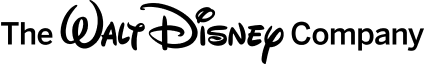

In [7]:
url = "https://abc7news.com/iteam/"

driver = webdriver.Firefox()


# Load Web Page
driver.get(url)

pageSource = driver.page_source
print(pageSource)

results = re.findall('<script type="text/javascript">.+</script>',pageSource)



if len(results) == 0:
    #//*** Throw some error message that says we can't work with this script
    pass


In [8]:
#//*** Find the script containing the Juicy JSON 
for raw in results:
    if "window['__abcotv__']" in raw:
        #//*** Strip Javascript tags from raw text
        # 
        raw = raw.replace('<script type="text/javascript">',"").replace("</script>","")[:-1]
        raw = raw[raw.index("=")+1:]
        obj = json.loads(raw)
        
        #print(obj.keys())
        #print(obj['page']['content'].keys())
        
        print(obj['page']['content']['category'].keys())
        #print(obj['page']['content']['category']['allStories']['topStories'])
        
        for item in obj['page']['content']['category']['allStories']['topStories']:
            
            if item['type'] == 'post':
                
                print(str(item["date"]) + ":" + item['title'] )
                
        print(obj['page']['content']['category']['moreStories'])
        #print(obj['page']['content']['shell'].keys())

dict_keys(['title', 'metatitle', 'description', 'headerImage', 'customMetaImage', 'leadStory', 'helpfulLinks', 'communityLinks', 'topStories', 'moreStories', 'allStories', 'tags', 'offset', 'mobileOffset'])
1684463419:Suspect in fatal stabbing of tech exec Bob Lee pleads not guilty
1684199185:Durham report criticizes FBI for actions in Russia investigation
1683943200:Did Oakland have right cyber insurance before ransomware hack?
1683942187:New calls for federal oversight on Vallejo PD
1683788640:Mom of SF Walgreens shooting victim talks; witness shares new video
1683764777:Here's what's coming to SF street infamous for alleged sex work
1683688920:FBI not negotiating with group that leaked Oakland data
1683342096:EXCLUSIVE: Gardener speaks out on clash with San Rafael PD over beer
1683255065:How San Mateo Co.'s new sanctuary policy works, it's controversy 
1683247125:Oakland's public housing waitlist is 9 years long: Housing Authority
1682538414:Oakland Hills neighborhood left off PG&E'

In [9]:
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")

#//*** Keep all classnames in a dictionary
g = {
    #//*** Classname for the Show More Button
    "class_more_button" : "show-button-more",

    #//*** Grid Classname that contains the linked stories
    "story_grid" : "grid3",

    #//*** Story Classes that contain the href Links
    "story_link_class" : "AnchorLink",

}

#//*****************************************************
#//*** Wait until the Show More Button is loaded
#//*****************************************************
elements = []
control = 0
while len(elements) == 0:

    #//*** Page is Loaded when class_more_button is displayed
    #elements = driver.find_elements_by_class_name(g["class_more_button"])
    elements = driver.find_elements(By.CLASS_NAME,g["class_more_button"])

    control += 1
    #//*** Wait if element not found
    if len(elements) == 0:
        time.sleep(1)

    if control > 15:
        print("Show More Button Not Loaded!")


In [12]:
    #//*****************************************************
    #//*** Wait until the Show More Button is loaded
    #//*****************************************************
    elements = []
    control = 0
    while len(elements) == 0:

        #//*** Page is Loaded when class_more_button is displayed
        #elements = driver.find_elements_by_class_name(g["class_more_button"])
        elements = driver.find_elements(By.CLASS_NAME,g["class_more_button"])

        control += 1
        #//*** Wait if element not found
        if len(elements) == 0:
            time.sleep(1)

        if control > 15:
            print("Show More Button Not Loaded!")


    #//*************************************************
    #//*** The first elements is the button to click
    #//*************************************************
    elem_show_more = elements[0]

    #actions = ActionChains(driver)
    #actions.move_to_element(element).perform()

    print(elem_show_more.is_displayed())
    print(elem_show_more.location['y'])

True
1885


In [13]:

try:
    #//*** Click Show More
    elem_show_more.click()
except:
    iframes = driver.find_elements_by_tag_name("iframe")
    for iframe in iframes:
        print(iframe.get_property("name"))


        driver.execute_script("arguments[0].style.visibility='hidden'", iframe)
    #//*** Click Show More
    elem_show_more.click()

In [17]:
pageSource = driver.page_source
#print(pageSource)

results = re.findall('<script type="text/javascript">.+</script>',pageSource)



if len(results) == 0:
    #//*** Throw some error message that says we can't work with this script
    pass

#//*** Find the script containing the Juicy JSON 
for raw in results:
    if "window['__abcotv__']" in raw:
        #//*** Strip Javascript tags from raw text
        # 
        raw = raw.replace('<script type="text/javascript">',"").replace("</script>","")[:-1]
        raw = raw[raw.index("=")+1:]
        obj = json.loads(raw)
        
        #print(obj.keys())
        #print(obj['page']['content'].keys())
        
        print(obj['page']['content']['category'].keys())
        #print(obj['page']['content']['category']['allStories']['topStories'])
        
        for item in obj['page']['content']['category']['allStories']['topStories']:
            
            if item['type'] == 'post':
                
                print(str(item["date"]) + ":" + item['title'] )
                
        #print(obj['page']['content']['category']['moreStories'])
        #print(obj['page']['content']['shell'].keys())

dict_keys(['title', 'metatitle', 'description', 'headerImage', 'customMetaImage', 'leadStory', 'helpfulLinks', 'communityLinks', 'topStories', 'moreStories', 'allStories', 'tags', 'offset', 'mobileOffset'])
1684463419:Suspect in fatal stabbing of tech exec Bob Lee pleads not guilty
1684199185:Durham report criticizes FBI for actions in Russia investigation
1683943200:Did Oakland have right cyber insurance before ransomware hack?
1683942187:New calls for federal oversight on Vallejo PD
1683788640:Mom of SF Walgreens shooting victim talks; witness shares new video
1683764777:Here's what's coming to SF street infamous for alleged sex work
1683688920:FBI not negotiating with group that leaked Oakland data
1683342096:EXCLUSIVE: Gardener speaks out on clash with San Rafael PD over beer
1683255065:How San Mateo Co.'s new sanctuary policy works, it's controversy 
1683247125:Oakland's public housing waitlist is 9 years long: Housing Authority
1682538414:Oakland Hills neighborhood left off PG&E'

In [53]:
#Xpath=//input[@type='text']
elements = driver.find_elements(By.XPATH,"//script")


#print(dir(elements[0]))
for element in elements:
    if "__abcotv__" in element.get_attribute("outerHTML"):
        #print(element.get_attribute("outerHTML"))
        results = re.findall('<script type="text/javascript">.+</script>',element.get_attribute("outerHTML"))



        if len(results) == 0:
            #//*** Throw some error message that says we can't work with this script
            pass

        #//*** Find the script containing the Juicy JSON 
        for raw in results:
            if "window['__abcotv__']" in raw:
                #//*** Strip Javascript tags from raw text
                # 
                raw = raw.replace('<script type="text/javascript">',"").replace("</script>","")[:-1]
                raw = raw[raw.index("=")+1:]
                obj = json.loads(raw)

                #print(obj.keys())
                #print(obj['page']['content'].keys())

                print(obj['page']['content']['category'].keys())
                #print(obj['page']['content']['category']['allStories']['topStories'])

                #for item in obj['page']['content']['category']['allStories']['topStories']:
                for item in obj['page']['content']['category']['moreStories']['topStories']:
                   # print(item)
                    if item['type'] == 'post':

                        print(str(item["date"]) + ":" + item['title'] )



    
    

dict_keys(['title', 'metatitle', 'description', 'headerImage', 'customMetaImage', 'leadStory', 'helpfulLinks', 'communityLinks', 'topStories', 'moreStories', 'allStories', 'tags', 'offset', 'mobileOffset'])
1683688920:FBI not negotiating with group that leaked Oakland data
1683342096:EXCLUSIVE: Gardener speaks out on clash with San Rafael PD over beer
1683255065:How San Mateo Co.'s new sanctuary policy works, it's controversy 
1683247125:Oakland's public housing waitlist is 9 years long: Housing Authority
1682538414:Oakland Hills neighborhood left off PG&E's underground powerlines plan
1682478446:I-Team obtains video at center of APD excessive force lawsuit
1682478241:What data shows about crimes committed by immigrants in San Mateo Co.
1682188440:San Mateo Co. to protect asylum seekers convicted of murder, rape
1681527259:TIMELINE: Court docs show events leading to fatal stabbing of Bob Lee
1681445451:An in-depth look at 2 Bay Area restorative justice programs
1681362874:Oakland ranso

In [ ]:
#//*** Parses a 
def get_scripts(source_urls,headless=True):
    
    out = []
    
    #//*** Initialize Headless Firefox options 
    options = webdriver.FirefoxOptions()
    options.add_argument('-headless')   
    
    if headless:


        #//*** Span Headless Instance
        page_driver = webdriver.Firefox(options=options)
    else:
        # run firefox webdriver from executable path of your choice
        page_driver = webdriver.Firefox()

    
    
    for i,url in enumerate(source_urls):
        
        error_counter = 1
        print(f"({i+1}/{len(source_urls)}) - {url}")
        
        while error_counter < 6:
            print("Downloading Page: Attempt ",error_counter )
            try:
                page_driver.get(url)
                error_counter = 10
            except:
                error_counter += 1
                
                print("Problem Getting Page...Trying Again")

        #//*** Reset any Story errors 
        story_error = False
        
        loop_story = {
                "url" : url,
                "headline" : None,
                "time_text" : None,
                "body_text" : None,
                'time_date' : None,
            }
        #//*******************
        #//**** Get Headline
        #//*******************

        #FITT_Article_main__body
        main_body = page_driver.find_elements(By.CLASS_NAME,"FITT_Article_main__body")
        
        #//*** Verify we have main_body elements
        if len(main_body) > 0:
            #//*** Assume Main Body is the first element. If not we in trouble
            #//*** mmmmm dirty dirty Type conversion
            main_body = main_body[0]
            

            #//*******************
            #//**** Get Headline
            #//*******************
            #//*** Only assign valid headline
            
            #//*** Get the Headline from the main Body. It should be the first (and only) h1. 
            headline = main_body.find_elements(By.CSS_SELECTOR,"h1")
            
            #//*** Check to ensure we actually have h1 elements
            if len(headline) > 0:
                #//*** Dirty dirty type conversion
                headline = headline[0].text
                
                #//*** Assign Headline
                loop_story["headline"] = headline
        
            #//********************
            #//**** Get Date
            #//********************

            #//*** Date is located withing the ShareByline Class
            byLine = main_body.find_elements(By.CLASS_NAME,"ShareByline")[0]

            #//*** Get All divs under ShareByline
            div_list = byLine.find_elements(By.CSS_SELECTOR,"div")

            #//*** The Date will be in a div with no children
            for elem in div_list:
                #//*** If div has div children, skip it
                if len(elem.find_elements(By.CSS_SELECTOR,"div")) > 0:
                       continue

                #//*** Try to convert Element Text to Date
                #//*** Skip Element if conversion fails
                try:
                    d = pd.to_datetime(elem.text)        
                except:
                    continue

                #//*** Verify d is actually a timestamp / Date.
                #//*** Will get NaT result on empty field
                if isinstance(d,pd._libs.tslibs.timestamps.Timestamp):
                    loop_story["time_text"] = elem.text
                    loop_story['time_date'] = d
                    break

            #//********************************
            #//*** Get Main Body Text
            #//********************************

            #//*** Article is contained within the article tag
            article = main_body.find_elements(By.CSS_SELECTOR,"article")

            whole_text = ""

            #//*** Double check we actually have the article
            if len(article) > 0:
                #//*** We could take the entire article text, but it includes related links and add text.
                #//*** We are better than that.
                #//*** Get each p element. Keep elements that have 0 children
                #//*** In the example, the first p element has one child, probably for datelineing. We'll keep the first
                #//*** p element then skip any element that has children.

                elems = article[0].find_elements(By.CSS_SELECTOR,"p")

                #//*** Check to see if we actually have story text
                if len(elems) > 0:
                    #//*** Assume First elem is valid
                    whole_text += elems[0].text
                    for elem in elems:
                        try:
                            #//*** Only Keep elements with no children
                            if len(elem.find_elements(By.XPATH, ".//*")) == 0:
                                whole_text += elem.text
                        except:
                            print("Problem processing Story Text. Element may have gone stale")
                            story_error = True 

                    loop_story["body_text"] = whole_text
            else:
                pass

            

            
        else:
            print("Problem Processing Main Body. Got a core parsing issue")
            story_error = True
    
        
        #//*** Throw an error if any loop_story field is None:
        for key,value in loop_story.items():
            
            if value == None:
                story_error = True
                print("Story Parsing Error:",key,"is",value)
            
        #//*** Keep Story if No Errors
        if not story_error:
            out.append(loop_story)
        
        #wait between 1/2 to 3 seconds
        time.sleep(random.randint(500, 3000)/1000)                                                              

    page_driver.quit()
                                                                        
    return out

In [ ]:
def get_all_urls_in_page(source_url,tgt_date,headless=True):

    #//*** Keep all classnames in a dictionary
    g = {
        #//*** Classname for the Show More Button
        "class_more_button" : "show-button-more",
        
        #//*** Grid Classname that contains the linked stories
        "story_grid" : "grid3",
        
        #//*** Story Classes that contain the href Links
        "story_link_class" : "AnchorLink",
        
    }
    
    #//*** Initialize Headless Firefox options 
    options = webdriver.FirefoxOptions()
    options.add_argument('-headless')   
    
    if headless:


        #//*** Span Headless Instance
        driver = webdriver.Firefox(options=options)
    else:
        # run firefox webdriver from executable path of your choice
        driver = webdriver.Firefox()


    # Load Web Page
    driver.get(source_url)
    
    # execute script to scroll down the page
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")


    #//*****************************************************
    #//*** Wait until the Show More Button is loaded
    #//*****************************************************
    elements = []
    control = 0
    while len(elements) == 0:

        #//*** Page is Loaded when class_more_button is displayed
        #elements = driver.find_elements_by_class_name(g["class_more_button"])
        elements = driver.find_elements(By.CLASS_NAME,g["class_more_button"])

        control += 1
        #//*** Wait if element not found
        if len(elements) == 0:
            time.sleep(1)

        if control > 15:
            print("Show More Button Not Loaded!")
            return
            break

    #//*************************************************
    #//*** The first elements is the button to click
    #//*************************************************
    elem_show_more = elements[0]

    #actions = ActionChains(driver)
    #actions.move_to_element(element).perform()

    print(elem_show_more.is_displayed())
    print(elem_show_more.location['y'])
    
    #results = driver.find_elements_by_class_name(g["story_grid"])[0].find_elements_by_class_name(g["story_link_class"])
    results = driver.find_elements(By.CLASS_NAME,g["story_grid"])[0].find_elements(By.CLASS_NAME,g["story_link_class"])

    if len(results) > 0:
        print("Last Page: ", results[0].get_property('href'))

    
    
    #print(results[-1].get_property('href'))

    
    #print(story_time,tgt_date, story_time < tgt_date)
                                                                        
    #//*** Get the last url to check in stories are within the quarter
    last_url = results[-1].get_property('href')
    
    try:
        #//*** Download the last script
        last_script = get_scripts([last_url])[0]
    except:
        print("Problem getting last script")
        print("Last url: ", last_url)
        print("get Scripts: ", get_scripts([last_url]))
        print("Skipping..")
        return []
    last_date = last_script['time_date']
    print("Last Script: ", last_script['headline'],"\n",last_script["time_text"])
    print("Last Script: ", last_script['time_date'] < tgt_date)
    
    #//*** Maximum number of while loops.
    maxDepth = 20
    depth = 0
    
    #//*** Click Show More until Last Story is older than the tgt_date
    while last_date > tgt_date:
        depth += 1
        
        #//*** Scroll to Bottom of page
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        
        print(f"Clicking More Depth: {depth}")
        #print(dir(elem_show_more))
        while elem_show_more.is_displayed() == False:
            print("Is Displayed:",str(elem_show_more.is_displayed()))
            time.sleep(1)
        
        
        try:
            #//*** Click Show More
            elem_show_more.click()
        except:
            iframes = driver.find_elements_by_tag_name("iframe")
            for iframe in iframes:
                print(iframe.get_property("name"))
                
                
                driver.execute_script("arguments[0].style.visibility='hidden'", iframe)
            #//*** Click Show More
            elem_show_more.click()
                
        #    return

    
        #//*** Get Updated Results
        #results = driver.find_elements_by_class_name(g["story_grid"])[0].find_elements_by_class_name(g["story_link_class"])        
        results = driver.find_elements(By.CLASS_NAME,g["story_grid"])[0].find_elements(By.CLASS_NAME,g["story_link_class"])        
        
        #//*** Get the last url to check in stories are within the quarter
        last_url = results[-1].get_property('href')

        #//*** Download the last script
        script_list = get_scripts([last_url])
        if len(script_list) == 0:
            print("No Scripts Found in this category")
            print("Quitting")
            driver.quit()
            return []
            
        last_script = script_list[0]
        last_date = last_script['time_date']
        print("Last Script: ", last_script['headline'],"\n",last_script["time_text"])
        print("Last Script: ", last_script['time_date'] < tgt_date)

        if depth > maxDepth:
            print("Maximum Depth Reached on Clicking Show More")
            break
        
    
    out = []
    
    for result in results:
        out.append(result.get_property('href'))
    
    #//*** Shut down main scrape
    driver.quit()
    
    

    return out

In [ ]:
#//*** Hash url list and compare to cache_df
#//*** returns a tuple of urls (orig_urls,dupe_urls)
def keep_original_urls(urls,cache_df):
    orig_urls = []
    dupe_urls = []
    
    tdf = pd.DataFrame()
    tdf['urls'] = urls
    
    tdf['hash'] = pd.util.hash_pandas_object(tdf['urls'])


    #//*** Check for Duplicates
    tdf['dupe'] = tdf['hash'].isin(cache_df['hash'])
    #tdf['dupe'] = tdf['urls'].isin(cache_df['urls'])
    
    #//*** Keep Only False Stories, which are not duplicates
    #//*** This means a story can have only a single category.
    #//*** May have to handle multiple categories at a future time
    #print(f"Length Before: {len(tdf)} ")

    orig_urls = list(tdf[tdf['dupe'] == False]['urls'])
    dupe_urls = list(tdf[tdf['dupe'] == True]['urls'])

    
    
    return orig_urls,dupe_urls

In [ ]:

url_items = [
    {
        "url" : "https://abc7news.com/tag/climate-change/",
        "cat" : "Climate"
    },
    {
        "url" : "https://abc7news.com/tag/environment/",
        "cat" : "Environment"
    },
 
    {
        "url" : "https://abc7news.com/tag/economy/",
        "cat" : "Economy"
    },
    {
        "url" : "https://abc7news.com/tag/jobs/",
        "cat" : "Jobs"
    },    
    {
        "url" : "https://abc7news.com/tag/safety/",
        "cat" : "Safety"
    },
    {
        "url" : "https://abc7news.com/tag/health/",
        "cat" : "Health"
    },
    {
        "url" : "https://abc7news.com/education/",
        "cat" : "Education"
    },
    {
        "url" : "https://abc7news.com/tag/race-and-culture/",
        "cat" : "Race"
    },
    {
        "url" : "https://abc7news.com/tag/discrimination/",
        "cat" : "Discrimination"
    },
    {
        "url" : "https://abc7news.com/tag/civil-rights/",
        "cat" : "Civil Rights"
    },
    {
        "url" : "https://abc7news.com/tag/building-a-better-bay-area/",
        "cat" : "BABBA"
    },
    {
        "url" : "https://abc7news.com/7onyourside/",
        "cat" : "7OYS"
    },
    {
        "url" : "https://abc7news.com/tag/covid-19/",
        "cat" : "COVID"
    },

    {
        "url" : "https://abc7news.com/iteam/",
        "cat" : "I-TEAM"
    },
    

    
]
urlpages = ['https://abc7news.com/education/',
            'https://abc7news.com/tag/building-a-better-bay-area/',
            'https://abc7news.com/7onyourside/',
            'https://abc7news.com/tag/covid-19/',
            'https://abc7news.com/tag/climate-change/',
            'https://abc7news.com/iteam/'
           ]

#urlpage ='https://abc7news.com/education/'
#urls = get_all_urls_in_page(urlpages[1],tgt_date,False)
#print(urlpage)

#//*** Loop through top level url_items
for item in url_items:
    cat_url = item['url']
    cat = item['cat']
    
    #//*** Download the ctageory URLs
    urls = get_all_urls_in_page(cat_url,tgt_date,False)
    
    #//*** Get non-duplicate urls to download and a list of the duplicate urls
    #//*** We may need to incorporate duplicates with different categories...later
    if len(cache_df) > 0:
        urls_to_dl,dupe_urls = keep_original_urls(urls,cache_df)
    else:
        #//*** There is no cache initialize and move one
        urls_to_dl = urls
        dupe_urls = []
    print("=====================")
    print(f"Category: {cat}")
    print("=====================")
    print(f"DL Items: {len(urls_to_dl)} - Duplicate: {len(dupe_urls)}")
    
    if len(urls_to_dl) == 0:
        print("No New Items to Download!")
    
    if len(urls_to_dl) > 0:
        scripts = get_scripts(urls_to_dl)
        
        #//*** Convert Scripts to DataFrame
        df = pd.DataFrame()
        #df['urls'] = urls_to_dl

        s = {}

        #//*** Get each script value as a list
        for script in scripts:

            for key,value in script.items():
                if key not in s.keys():
                    s[key] = []
                s[key].append(value)

        #//*** build Urls field
        #//*** Use the Story URL in case an url was skipped.
        df['urls'] = s['url']
        df['hash'] = pd.util.hash_pandas_object(df['urls'])
        df['cat'] = cat

        #//*** Add lists of script values as columns
        for key,value in s.items():
            df[key] = value

        #//*** Combine cache_df and df
        cache_df = pd.concat([cache_df,df])


#//*** Everything is Gathered. Write Cache_df to disk
#//*** Write DF to file
pd.to_pickle(cache_df,cache_filepath)
    

In [ ]:
cache_df

In [ ]:
#cache_df['time_date'] = cache_df['time_date'].dt.date
#print("Length Before de-dupe:",len(cache_df)
#cache_df = cache_df.drop_duplicates(subset="url")
      
#print("Length Before de-dupe:",len(cache_df)

cache_df.drop_duplicates(subset="url")
cache_df.drop_duplicates(subset="headline")

In [ ]:
#//*** Write to excel file
output_filename = f"{tgt_year}_{quarter}_Collected_Stories.xlsx"
print(output_filename)

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter(output_filename, engine='xlsxwriter')

#//*** Build Sheet and Data from From each url_item element
for url_item in url_items:
    sheet = url_item['cat']
    
    tdf = cache_df[cache_df['cat'] == sheet].copy()
    
    tdf = tdf[['urls','time_date','time_text','headline','body_text']].sort_values('time_date',ascending=False)
    
    tdf.to_excel(writer,sheet_name=sheet)
    
try:
    writer.save()    
except:
    print("Trouble Saving the Spreadsheet. It's Probably Open Somewhere. Close it and Retry")    
    

In [ ]:
cache_df

In [ ]:
cache_df.drop_duplicates(subset="url")
cache_df.drop_duplicates(subset="headline")

In [ ]:
url_items = [
    {
        "url" : "https://abc7news.com/tag/climate-change/",
        "cat" : "Climate"
    },
    {
        "url" : "https://abc7news.com/tag/environment/",
        "cat" : "Environment"
    },
 
    {
        "url" : "https://abc7news.com/tag/economy/",
        "cat" : "Economy"
    },
    {
        "url" : "https://abc7news.com/tag/jobs/",
        "cat" : "Jobs"
    },    
    {
        "url" : "https://abc7news.com/tag/safety/",
        "cat" : "Safety"
    },
    {
        "url" : "https://abc7news.com/tag/health/",
        "cat" : "Health"
    },
    {
        "url" : "https://abc7news.com/education/",
        "cat" : "Education"
    },
    {
        "url" : "https://abc7news.com/tag/race-and-culture/",
        "cat" : "Race"
    },
    {
        "url" : "https://abc7news.com/tag/discrimination/",
        "cat" : "Discrimination"
    },
    {
        "url" : "https://abc7news.com/tag/civil-rights/",
        "cat" : "Civil Rights"
    },
    {
        "url" : "https://abc7news.com/tag/building-a-better-bay-area/",
        "cat" : "BABBA"
    },
    {
        "url" : "https://abc7news.com/7onyourside/",
        "cat" : "7OYS"
    },
    {
        "url" : "https://abc7news.com/tag/covid-19/",
        "cat" : "COVID"
    },

    {
        "url" : "https://abc7news.com/iteam/",
        "cat" : "I-TEAM"
    },
    

    
]

try:
    cache_df['time_date'] = cache_df['time_date'].dt.date
except:
    pass

#//*** Write to excel file
output_filename = f"{tgt_year}_{quarter}_Collected_Stories.xlsx"
print(output_filename)

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter(output_filename, engine='xlsxwriter')

#//*** Build Sheet and Data from From each url_item element
for url_item in url_items:
    sheet = url_item['cat']
    
    tdf = cache_df[cache_df['cat'] == sheet].copy().sort_values("time_date",ascending=False)
    
    tdf = tdf[['urls','time_date','time_text','headline','body_text']]
    
    tdf.to_excel(writer,sheet_name=sheet)
    

workbook = writer.book


cell_format = workbook.add_format()


for url_item in url_items:
    sheet = url_item['cat']
    writer.sheets[sheet].set_column(2,2, 10)      
    writer.sheets[sheet].set_column(4,4, 20) 
    
for url_item in url_items:
    sheet = url_item['cat']
    cell_format.set_font_name('Arial')
    cell_format.set_font_size(12)


     
    writer.sheets[sheet].set_column('A:F', None, cell_format)  
    
    
try:
    writer.close()    
except:
    print("Trouble Saving the Spreadsheet. It's Probably Open Somewhere. Close it and Retry")   

In [ ]:
dir(cell_format)

In [ ]:
"""
END MAIN PROGRAM
Degbugging Code Below
"""

In [ ]:
STOP_HERE

In [ ]:
urls = ['https://abc7news.com/california-drought-santa-cruz-county-seawater-intrusion-soquel-creek-water-district/11869614/']
get_scripts(urls,False)

In [ ]:
page_driver = webdriver.Firefox()
page_driver.get(urls[0])

In [ ]:
url = urls[0]
loop_story = {
    "url" : url,
    "headline" : page_driver.find_elements(By.CLASS_NAME,"headline")[0].text,
    "time_text" : page_driver.find_elements(By.CLASS_NAME,"lastmodified")[0].text,
    "body_text" : page_driver.find_elements(By.CLASS_NAME,"body-text")[0].text,
}

In [ ]:
element = page_driver.find_element_by_tag_name("body")
raw_text = element.get_attribute('innerHTML')
for x in raw_text.split(">"):
    print(x)

In [ ]:
#//*******************
#//**** Get Headline
#//*******************

#FITT_Article_main__body
main_body = page_driver.find_elements(By.CLASS_NAME,"FITT_Article_main__body")[0]

#//*** Main Body Headline
main_body.find_elements(By.CSS_SELECTOR,"h1")[0].text


    

In [ ]:
#//********************
#//**** Get Date
#//********************

#//*** Date is located withing the ShareByline Class
byLine = main_body.find_elements(By.CLASS_NAME,"ShareByline")[0]
 
#//*** Get All divs under ShareByline
div_list = byLine.find_elements(By.CSS_SELECTOR,"div")

#//*** The Date will be in a div with no children
for elem in div_list:
    #//*** If div has div children, skip it
    if len(elem.find_elements(By.CSS_SELECTOR,"div")) > 0:
           continue
            
    #//*** Try to convert Element Text to Date
    #//*** Skip Element if conversion fails
    try:
        d = pd.to_datetime(elem.text)        
    except:
        continue
    
    #//*** Verify d is actually a timestamp / Date.
    #//*** Will get NaT result on empty field
    if isinstance(d,pd._libs.tslibs.timestamps.Timestamp):
        print("Date is ",d)
        break
    else:
        d = None
    

In [ ]:
#//*** Extract Main Body.

#//*** Article is contained within the article tag
article = main_body.find_elements(By.CSS_SELECTOR,"article")

whole_text = ""

#//*** Double check we actually have the article
if len(article) > 0:
    #//*** We could take the entire article text, but it includes related links and add text.
    #//*** We are better than that.
    #//*** Get each p element. Keep elements that have 0 children
    #//*** In the example, the first p element has one child, probably for datelineing. We'll keep the first
    #//*** p element then skip any element that has children.
    
    elems = article[0].find_elements(By.CSS_SELECTOR,"p")
    
    #//*** Assume First elem is valid
    whole_text += elems[0].text
    for elem in elems:
        #//*** Only Keep elements with no children
        if len(elem.find_elements(By.XPATH, ".//*")) == 0:
            whole_text += elem.text
else:
    pass

print(whole_text)

In [ ]:
for item in url_items:
    cat_url = item['url']
    cat = item['cat']
    
    #//*** Download the ctageory URLs
    urls = get_all_urls_in_page(cat_url,tgt_date,False)
    
    break

In [ ]:
#//*** Parses a 
def get_scripts(source_urls,headless=True):
    
    out = []
    
    #//*** Initialize Headless Firefox options 
    options = webdriver.FirefoxOptions()
    options.add_argument('-headless')   
    
    if headless:


        #//*** Span Headless Instance
        page_driver = webdriver.Firefox(options=options)
    else:
        # run firefox webdriver from executable path of your choice
        page_driver = webdriver.Firefox()

    
    
    for i,url in enumerate(source_urls):
        
        print(f"({i+1}/{len(source_urls)}) - {url}")
        try:
            page_driver.get(url)
        except:
            print("Problem Getting Page...Skipping")
            continue
        
        #//*** Reset any Story errors 
        story_error = False
        
        loop_story = {
                "url" : url,
                "headline" : None,
                "time_text" : None,
                "body_text" : None,
            }
        #//*******************
        #//**** Get Headline
        #//*******************

        #FITT_Article_main__body
        main_body = page_driver.find_elements(By.CLASS_NAME,"FITT_Article_main__body")
        
        #//*** Verify we have main_body elements
        if len(main_body) > 0:
            #//*** Assume Main Body is the first element. If not we in trouble
            #//*** mmmmm dirty dirty Type conversion
            main_body = main_body[0]
            

            #//*******************
            #//**** Get Headline
            #//*******************
            #//*** Only assign valid headline
            
            #//*** Get the Headline from the main Body. It should be the first (and only) h1. 
            headline = main_body.find_elements(By.CSS_SELECTOR,"h1")
            
            #//*** Check to ensure we actually have h1 elements
            if len(headline) > 0:
                #//*** Dirty dirty type conversion
                headline = headline[0].text
                
                #//*** Assign Headline
                loop_story["headline"] = headline
        
            #//********************
            #//**** Get Date
            #//********************

            #//*** Date is located withing the ShareByline Class
            byLine = main_body.find_elements(By.CLASS_NAME,"ShareByline")[0]

            #//*** Get All divs under ShareByline
            div_list = byLine.find_elements(By.CSS_SELECTOR,"div")

            #//*** The Date will be in a div with no children
            for elem in div_list:
                #//*** If div has div children, skip it
                if len(elem.find_elements(By.CSS_SELECTOR,"div")) > 0:
                       continue

                #//*** Try to convert Element Text to Date
                #//*** Skip Element if conversion fails
                try:
                    d = pd.to_datetime(elem.text)        
                except:
                    continue

                #//*** Verify d is actually a timestamp / Date.
                #//*** Will get NaT result on empty field
                if isinstance(d,pd._libs.tslibs.timestamps.Timestamp):
                    loop_story["time_text"] = d
                    break

            #//********************************
            #//*** Get Main Body Text
            #//********************************

            #//*** Article is contained within the article tag
            article = main_body.find_elements(By.CSS_SELECTOR,"article")

            whole_text = ""

            #//*** Double check we actually have the article
            if len(article) > 0:
                #//*** We could take the entire article text, but it includes related links and add text.
                #//*** We are better than that.
                #//*** Get each p element. Keep elements that have 0 children
                #//*** In the example, the first p element has one child, probably for datelineing. We'll keep the first
                #//*** p element then skip any element that has children.

                elems = article[0].find_elements(By.CSS_SELECTOR,"p")

                #//*** Assume First elem is valid
                whole_text += elems[0].text
                for elem in elems:
                    #//*** Only Keep elements with no children
                    if len(elem.find_elements(By.XPATH, ".//*")) == 0:
                        whole_text += elem.text
                
                loop_story["body_text"] = whole_text
            else:
                pass

            

            
        else:
            print("Problem Processing Main Body. Got a core parsing issue")
            story_error = True
        
        loop_story["body_text"] = None
        
        #//*** Throw an error if any loop_story field is None:
        for key,value in loop_story.items():
            
            if value == None:
                story_error = True
                print("Story Parsing Error:",key,"is",value)
            
        #//*** Keep Story if No Errors
        if not story_error:
            out.append(loop_story)
        
        #wait between 1/2 to 3 seconds
        time.sleep(random.randint(500, 3000)/1000)                                                              

    page_driver.quit()
                                                                        
    return out

scripts = get_scripts(['https://abc7news.com/president-joe-biden-climate-change-executive-actions-emergency-declaration/12062764/'])
print(scripts[0])
print('done')

In [ ]:

#//*** Split the Date
loop_story['time_date'] = loop_story['time_text'].split()

#//*** Rebuild Date string using only the first four fields. Drop the extra time
loop_story['time_date'] = " ".join(loop_story['time_date'][:4])

loop_story['time_date'] = datetime.datetime.strptime(loop_story['time_date'], "%A, %B %d, %Y")

In [ ]:
#//*** Backup Copy of original get_scripts
"""
#//*** Parses a 
def get_scripts(source_urls,headless=True):
    
    out = []
    
    #//*** Initialize Headless Firefox options 
    options = webdriver.FirefoxOptions()
    options.add_argument('-headless')   
    
    if headless:
    if headless:


        #//*** Span Headless Instance
        page_driver = webdriver.Firefox(options=options)
    else:
        # run firefox webdriver from executable path of your choice
        page_driver = webdriver.Firefox()

    
    
    for i,url in enumerate(source_urls):
        
        print(f"({i+1}/{len(source_urls)}) - {url}")
        try:
            page_driver.get(url)
        except:
            print("Problem Getting Page...Skipping")
            continue
            
        
        try:
        
            loop_story = {
                "url" : url,
                "headline" : page_driver.find_elements(By.CLASS_NAME,"headline")[0].text,
                "time_text" : page_driver.find_elements(By.CLASS_NAME,"lastmodified")[0].text,
                "body_text" : page_driver.find_elements(By.CLASS_NAME,"body-text")[0].text,
            }
            #//*** Split the Date
            loop_story['time_date'] = loop_story['time_text'].split()

            #//*** Rebuild Date string using only the first four fields. Drop the extra time
            loop_story['time_date'] = " ".join(loop_story['time_date'][:4])

            loop_story['time_date'] = datetime.datetime.strptime(loop_story['time_date'], "%A, %B %d, %Y")
        except:
            print("Problem Processing Story. Skipping")
            continue
        out.append(loop_story)
        
        #wait between 1/2 to 3 seconds
        time.sleep(random.randint(500, 3000)/1000)                                                              

    page_driver.quit()
                                                                        
    return out
"""
print()